# Setup

In [1]:
import pandas as pd
import numpy as np
import INS_Analysis as insd

In [2]:
import seaborn as sns

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
trials = '../../Simulations/varied_detector_positions/trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,name,distance_from_shielding,distance_from_ground,filename,ptrac_filename
index,,,,,
0,detector_dfs_10_dfg_10,10.0,10.0,output/mctal/detector_dfs_10_dfg_10.mctal,output/ptrac/detector_dfs_10_dfg_10.ptrac
1,detector_dfs_10_dfg_15,10.0,15.0,output/mctal/detector_dfs_10_dfg_15.mctal,output/ptrac/detector_dfs_10_dfg_15.ptrac
2,detector_dfs_10_dfg_20,10.0,20.0,output/mctal/detector_dfs_10_dfg_20.mctal,output/ptrac/detector_dfs_10_dfg_20.ptrac
3,detector_dfs_10_dfg_25,10.0,25.0,output/mctal/detector_dfs_10_dfg_25.mctal,output/ptrac/detector_dfs_10_dfg_25.ptrac
4,detector_dfs_15_dfg_10,15.0,10.0,output/mctal/detector_dfs_15_dfg_10.mctal,output/ptrac/detector_dfs_15_dfg_10.ptrac
5,detector_dfs_15_dfg_15,15.0,15.0,output/mctal/detector_dfs_15_dfg_15.mctal,output/ptrac/detector_dfs_15_dfg_15.ptrac
6,detector_dfs_15_dfg_20,15.0,20.0,output/mctal/detector_dfs_15_dfg_20.mctal,output/ptrac/detector_dfs_15_dfg_20.ptrac
7,detector_dfs_15_dfg_25,15.0,25.0,output/mctal/detector_dfs_15_dfg_25.mctal,output/ptrac/detector_dfs_15_dfg_25.ptrac
8,detector_dfs_15_dfg_35,15.0,35.0,output/mctal/detector_dfs_15_dfg_35.mctal,output/ptrac/detector_dfs_15_dfg_35.ptrac


In [4]:
spectrograms = '../../Simulations/varied_detector_positions/spectrograms.npz'
spectrograms = np.load(spectrograms)
bins = spectrograms['x']
spectrograms = spectrograms['y']

spectrums = '../../Simulations/varied_detector_positions/spectrums.npz'
spectrums = np.load(spectrums)
spectrums = spectrums['y']

gebless_spectrums = '../../Simulations/varied_detector_positions/gebless_spectrums.npz'
gebless_spectrums = np.load(gebless_spectrums)
gebless_spectrums = gebless_spectrums['y']

In [5]:
import matplotlib.pyplot as plt

In [6]:
elements = {
    'f': {
        'title': None,
        'xlim': None,
    }, 
    'c': {
        'title': 'Carbon',
        'xlim': (3.5, 5.5),
        'ylim': (4e0, 1e2),
        'windowlabel': 'Si2C1',
    },
    'si': {
        'title': 'Silicon',
        'xlim': (1.4, 2.2),
        'ylim': (3e1, 1e2),
        'windowlabel': 'Si1',
    }
}

# Im Ax

In [7]:
import matplotlib.image as mpimg

In [8]:
# image show for model render
folder = 'blendervis/ims/'

def pngshow(ax, index):
    name = trials.loc[index, 'name']
    ax.axis('off')
    img = mpimg.imread(folder+name+'.png')
    ax.imshow(img)

# location ax

In [9]:
def detector_positions(ax, index=None, z=None):
    # ax.scatter(trials['distance_from_shielding'], trials['distance_from_ground'])
    ax.scatter(trials['distance_from_shielding'], trials['distance_from_ground'], s=5, marker='v')
    hue_norm = (None, None)
    if z:
        hue_norm = (trials[z].mean(), trials[z].max())
    sns.scatterplot(x='distance_from_shielding', y='distance_from_ground', data=trials, ax=ax, hue=z, hue_norm=hue_norm)
    
    # put z next to their points
    if z:
        for i in range(trials.shape[0]):
            val = trials.loc[i][z]
            if val>0:
                ax.text(trials.loc[i]['distance_from_shielding'], trials.loc[i]['distance_from_ground'], int(trials.loc[i][z]), fontsize=7)
            # ax.text(trials.loc[i]['distance_from_shielding'], trials.loc[i]['distance_from_ground'], str(trials.loc[i][z])[:2])
    if z:
        pass
    ax.set_xlabel('Distance from Shielding (cm)')
    ax.set_ylabel('Distance from Ground (cm)')
    # ax.set_title('Detector Positions')
    if index:
        ax.scatter(trials.loc[index]['distance_from_shielding'], trials.loc[index]['distance_from_ground'], s=50, marker='x', color='blue')
    ax.legend().remove()

# spectrum ax

In [10]:
def plot_single_spectrum(ax, spectrums, fits=None, element=None, index=0, t=0):
    ax.plot(bins, spectrums[index][t])
    
    if element:
        windowlabel = elements[element]['windowlabel']
        if fits:
            ax.plot(fits[windowlabel]['bins'], fits[windowlabel]['peak'])
            ax.plot(fits[windowlabel]['bins'], fits[windowlabel]['baseline'])
    else:
        pass
    ax.set_yscale('log')
    ax.set_xlabel('Energy (keV)')
    # ax.set_ylabel('Counts')

    if element:
        # ax.set_title(element)
        ax.set_xlim(elements[element]['xlim'])
        ax.set_ylim(elements[element]['ylim'])

# Graphic 1

In [11]:
def g1(index):
    spectrum = spectrums[index]
    fig, axes = plt.subplot_mosaic("ABB;CCC", figsize=(10, 8))

    detector_positions(axes['A'], index=index)
    plot_single_spectrum(axes['B'], spectrums, index=index, t=0)
    pngshow(axes['C'], index)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_20509/3359541791.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


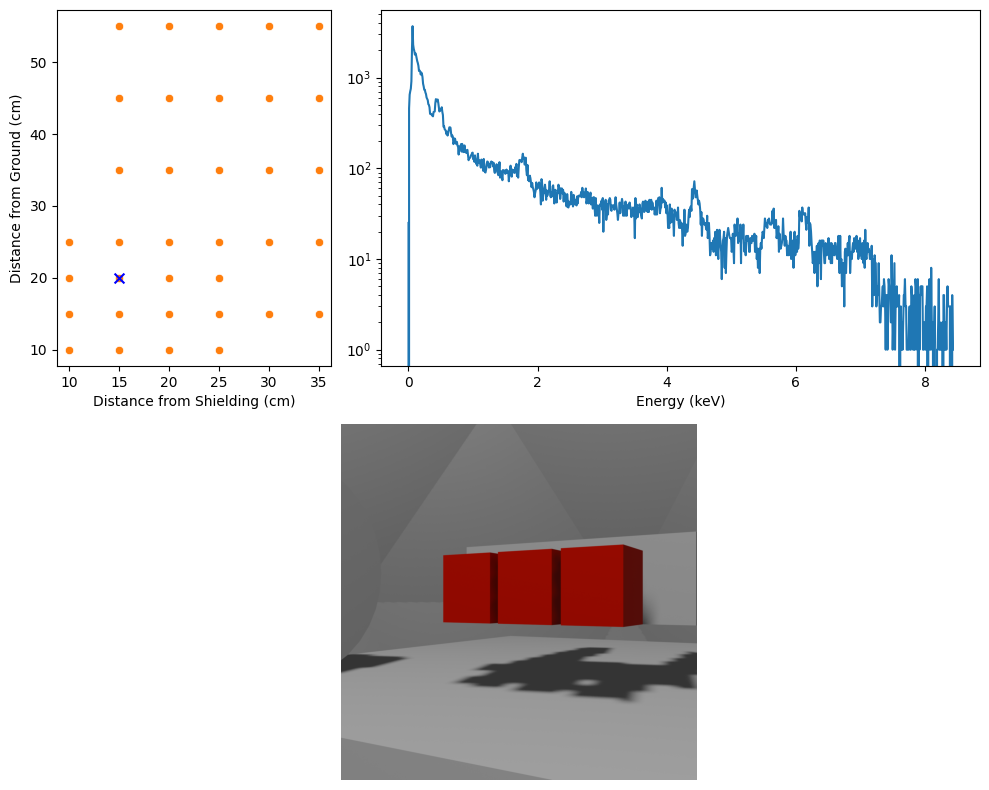

In [14]:
g1(6)

# Using the package


In [15]:
import tqdm


In [16]:
fitss = []
areas = []
for index in tqdm.tqdm(range(len(spectrums))):
    # try:
        area, fits = insd.calcPeakAreas(
            bins=bins, 
            vals=spectrums[index][0], 
            returnFits=True,
            peakwindows={
                            'Si1': [1.6, 1.9],
                            'Si2C1': [4.2, 4.8],
                        },
            geb={'a':-0.0073, 'b':0.078, 'c':0},
            baselineFunction='fat_tail',
            maxfev=50000,
                        
            )
        fitss.append(fits)
        areas.append(area)
    # except:
    #     print(f'Failed to process index {index}')
    #     fitss.append(None)
    #     areas.append(None)

trials['areas'] = areas
trials['fits'] = fitss
# if result is None then mark as outlier
trials['outlier'] = trials['areas'].apply(lambda x: x is None)

  0%|          | 0/35 [00:00<?, ?it/s]/home/jac2462@uta.edu/Documents/Tools/INS-Analysis/INS_Analysis/tools/fitting_functions.py:28: RuntimeWarning: invalid value encountered in power
  ret = (a/(x-x0)**p)+b
100%|██████████| 35/35 [00:02<00:00, 12.94it/s]


In [17]:
trials['Si1_area'] = trials['areas'].apply(lambda x: x['Si1'] if x else None)
trials['Si2C1_area'] = trials['areas'].apply(lambda x: x['Si2C1'] if x else None)

# hist ax

In [24]:
def histogram(ax, trials, column, index=None, bins=range(0, 16, 1)):
    sns.histplot(trials[column], bins=bins, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('')
    if index:
        ax.axvline(trials.loc[index][column], color='red')

# g2

In [25]:
def g2(index):
    fig, axes = plt.subplot_mosaic("AGB;CHD;EHF", figsize=(4*3.5, 3*3.5))
    
    detector_positions(axes['A'], index=index, z='Si1_area')
    detector_positions(axes['B'], index=index, z='Si2C1_area')
    plot_single_spectrum(axes['C'], spectrums, 
                         fits = trials.loc[index]['fits'],
                         element='si', index=index, t=0)
    plot_single_spectrum(axes['D'], spectrums, fits = trials.loc[index]['fits'], element='c', index=index, t=0)
    histogram(axes['E'], trials, 'Si1_area', index=index)
    histogram(axes['F'], trials, 'Si2C1_area', index=index)
    pngshow(axes['H'], index)
    plot_single_spectrum(axes['G'], spectrums, fits = trials.loc[index]['fits'], index=index, t=0)
    axes['G'].set_title(f'Index: {index}')
    axes['A'].set_title('Silicone Peak Area')
    axes['B'].set_title('Carbon Peak Area')
    plt.show()

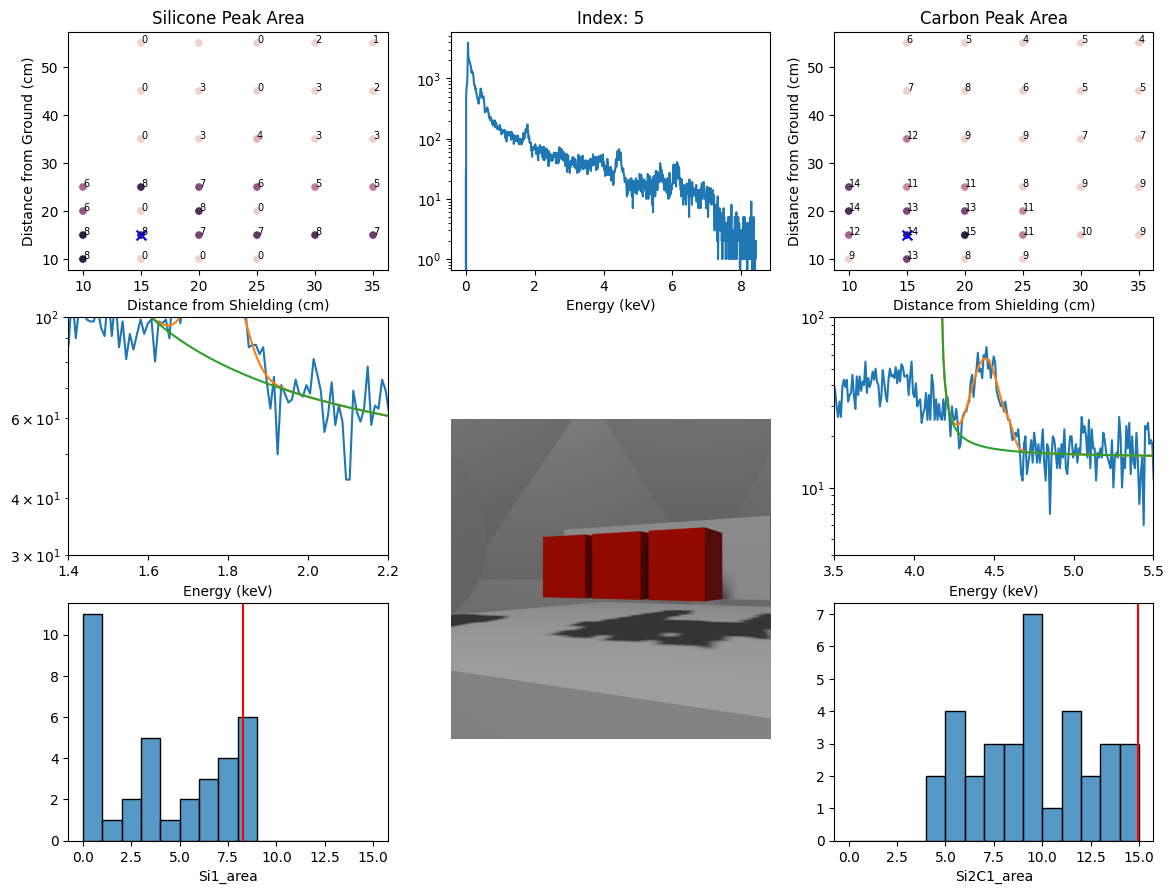

In [26]:
g2(5)

# g3

In [21]:
trials.reset_index(drop=False, inplace=True)

In [22]:
def g3():
    fig, axes = plt.subplot_mosaic("ABC;DEF", figsize=(4*3.5, 3*3.5))
    axes['B'].set_title('Silicone Peak Area')
    axes['C'].set_title('Carbon Peak Area')
    detector_positions(axes['B'], z='Si1_area')
    detector_positions(axes['C'], z='Si2C1_area')
    histogram(axes['E'], trials, 'Si1_area')
    histogram(axes['F'], trials, 'Si2C1_area')
    detector_positions(axes['A'], z='index')
    axes['A'].set_title('Trial Index')
    axes['D'].axis('off')
    plt.show()

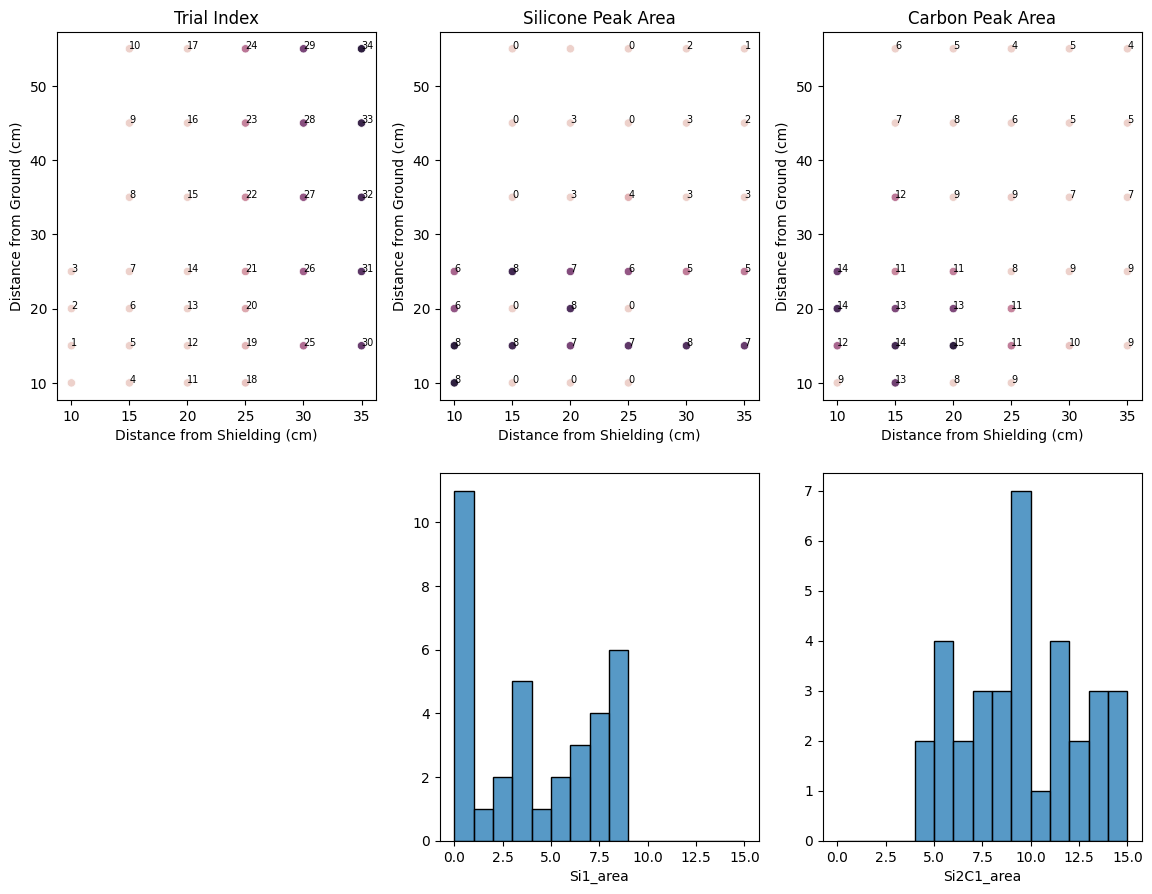

In [27]:
g3()